In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Getting data from exploratory analysis 
df2 = pd.read_csv(r'C:\Users\tnsub\Google Drive\SPRINGBOARD DSC\Customer_Churn_Project\Data\cc_1.csv')

In [3]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               7043 non-null   int64  
 1   CustomerID               7043 non-null   object 
 2   City                     7043 non-null   object 
 3   Zip Code                 7043 non-null   int64  
 4   Latitude                 7043 non-null   float64
 5   Longitude                7043 non-null   float64
 6   Gender                   7043 non-null   object 
 7   Senior Citizen           7043 non-null   object 
 8   Partner                  7043 non-null   object 
 9   Dependents               7043 non-null   object 
 10  Tenure Months            7043 non-null   int64  
 11  Phone Service            7043 non-null   object 
 12  Multiple Lines           7043 non-null   object 
 13  Internet Service         7043 non-null   object 
 14  Online Security         

**Creating a feature to account for City differences**\
In order to account for the differences in churning due to city variable, I calculated the churn rates in each city (around 1000 of them) and assign those values to rows with the corresponding city. This feature can be used as a proxy to account for differences in city.

In [4]:
a = df2.groupby('City').agg({'Churn Value': ['sum', 'count']})
a.columns = a.columns.droplevel()

In [5]:
churn_rate = (a['sum']/a['count'])*100

In [6]:
a['City_churn_rate'] = churn_rate

In [7]:
b = a.sort_values(by='count', ascending=False)

In [8]:
b = b.reset_index()

In [9]:
b.head()

,City,sum,count,City_churn_rate
0,Los Angeles,90,305,29.508197
1,San Diego,50,150,33.333333
2,San Jose,29,112,25.892857
3,Sacramento,26,108,24.074074
4,San Francisco,31,104,29.807692


In [10]:
#using a left join we can broadcast the churn rates in each city to the main data frame
df3 = df2.merge(b, on='City', how='left')

In [11]:
df3.head()

,Unnamed: 0,CustomerID,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,...,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason,Average Monthly Charges,sum,count,City_churn_rate
0,0,3668-QPYBK,Los Angeles,90003,33.964131,-118.272783,Male,No,No,No,...,108.15,Yes,1,86,3239,Competitor made better offer,54.075000,90,305,29.508197
1,1,9237-HQITU,Los Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,...,151.65,Yes,1,67,2701,Moved,75.825000,90,305,29.508197
2,2,9305-CDSKC,Los Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,...,820.50,Yes,1,86,5372,Moved,102.562500,90,305,29.508197
3,3,7892-POOKP,Los Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,...,3046.05,Yes,1,84,5003,Moved,108.787500,90,305,29.508197
4,4,0280-XJGEX,Los Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,...,5036.30,Yes,1,89,5340,Competitor had better devices,102.781633,90,305,29.508197


In [12]:
#dropping unnecessary columns
# Gender didn't have an impact on Churning, so we don't have to use it for further analysis
df4 = df3.drop(columns=['Churn Reason','Unnamed: 0', 'Gender', 'City', 'Zip Code', 'Latitude', 'Longitude', 'Monthly Charges', 'Total Charges',
                     'Churn Score', 'Churn Reason', 'sum', 'count'])

In [13]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               7043 non-null   object 
 1   Senior Citizen           7043 non-null   object 
 2   Partner                  7043 non-null   object 
 3   Dependents               7043 non-null   object 
 4   Tenure Months            7043 non-null   int64  
 5   Phone Service            7043 non-null   object 
 6   Multiple Lines           7043 non-null   object 
 7   Internet Service         7043 non-null   object 
 8   Online Security          7043 non-null   object 
 9   Online Backup            7043 non-null   object 
 10  Device Protection        7043 non-null   object 
 11  Tech Support             7043 non-null   object 
 12  Streaming TV             7043 non-null   object 
 13  Streaming Movies         7043 non-null   object 
 14  Contract                

**Creating Dummy Variables for Categorical Features**

In [14]:
df5 = pd.get_dummies(df4, columns=['Senior Citizen','Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service',
                                  'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract',
                                  'Paperless Billing', 'Payment Method'])

In [15]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 48 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   CustomerID                                7043 non-null   object 
 1   Tenure Months                             7043 non-null   int64  
 2   Churn Label                               7043 non-null   object 
 3   Churn Value                               7043 non-null   int64  
 4   CLTV                                      7043 non-null   int64  
 5   Average Monthly Charges                   7043 non-null   float64
 6   City_churn_rate                           7043 non-null   float64
 7   Senior Citizen_No                         7043 non-null   uint8  
 8   Senior Citizen_Yes                        7043 non-null   uint8  
 9   Partner_No                                7043 non-null   uint8  
 10  Partner_Yes                         

**Total number of services Customers have**

In addition to above features, I also calculated a feature to account for number of services a customer has; max number of services will be 5, accounting for Phone (single/more), internet, streaming TV, and streaming movies 

In [16]:
df5['#ofServices'] = df5['Phone Service_Yes'] + df5['Multiple Lines_Yes'] + df5['Internet Service_DSL'] + df5['Internet Service_Fiber optic'] + df5['Streaming TV_Yes'] + df5['Streaming Movies_Yes']

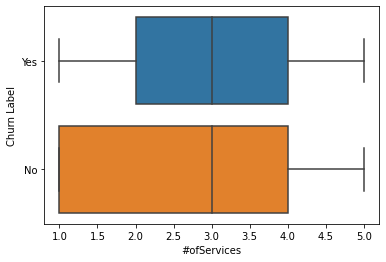

In [17]:
sns.boxplot(x='#ofServices', y='Churn Label', data=df5)
plt.show()

In [18]:
ct14 = pd.crosstab(df5['#ofServices'], df5['Churn Label'])
print(ct14)

Churn Label    No  Yes
#ofServices           
1            1303  180
2            1134  440
3            1006  490
4             893  388
5             838  371


In [19]:
data = [['Services_One', (ct14.iloc[0,1]/(ct14.iloc[0,0] + ct14.iloc[0,1])) * 100],
       ['Services_Two', (ct14.iloc[1,1]/(ct14.iloc[1,0] + ct14.iloc[1,1])) * 100],
       ['Services_Three',(ct14.iloc[2,1]/(ct14.iloc[2,0] + ct14.iloc[2,1])) *100],
       ['Services_Four', (ct14.iloc[3,1]/(ct14.iloc[3,0] + ct14.iloc[3,1])) * 100],
       ['Services_Five', (ct14.iloc[4,1]/(ct14.iloc[4,0] + ct14.iloc[4,1])) * 100]]
gg = pd.DataFrame(data, columns = ['#ofServices', 'Churn rate'])

In [20]:
def twoplots(x, barplotData):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle('Churn Rates in different attributes of ' + x)
    sns.countplot(ax=axes[0], x=x, data=df5, palette='rocket',hue='Churn Label')
    sns.barplot(ax=axes[1], x=x, y='Churn rate', data=barplotData)
    plt.show()

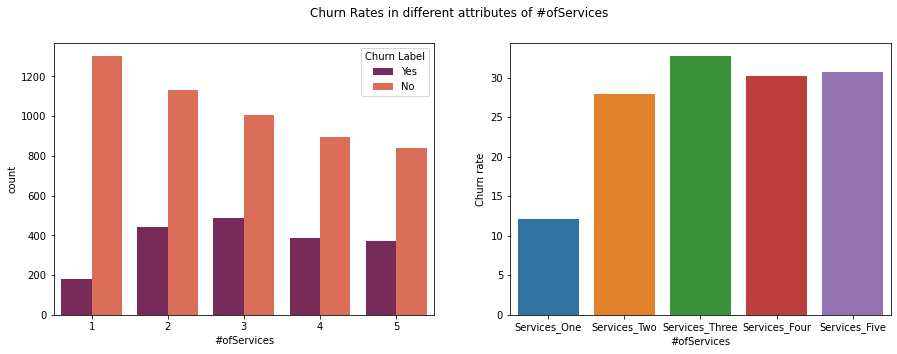

In [21]:
twoplots('#ofServices', gg)

In [22]:
df5['#ofServices'].value_counts()

2    1574
3    1496
1    1483
4    1281
5    1209
Name: #ofServices, dtype: int64

In [23]:
#Dropping unnecessary columns
df6 = df5.drop(['Senior Citizen_No', 'Partner_No', 'Dependents_No', 'Phone Service_No', 'Multiple Lines_No', 'Multiple Lines_No phone service', 'Internet Service_No', 'Online Security_No','Online Security_No internet service', 
                'Online Backup_No','Online Backup_No internet service', 'Device Protection_No','Device Protection_No internet service', 'Tech Support_No', 'Streaming TV_No','Streaming TV_No internet service','Tech Support_No internet service',
                'Streaming Movies_No', 'Streaming Movies_No internet service','Contract_Two year',
                'Paperless Billing_No', 'Payment Method_Mailed check', 'Churn Label'], axis=1)

In [24]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   CustomerID                                7043 non-null   object 
 1   Tenure Months                             7043 non-null   int64  
 2   Churn Value                               7043 non-null   int64  
 3   CLTV                                      7043 non-null   int64  
 4   Average Monthly Charges                   7043 non-null   float64
 5   City_churn_rate                           7043 non-null   float64
 6   Senior Citizen_Yes                        7043 non-null   uint8  
 7   Partner_Yes                               7043 non-null   uint8  
 8   Dependents_Yes                            7043 non-null   uint8  
 9   Phone Service_Yes                         7043 non-null   uint8  
 10  Multiple Lines_Yes                  

In [25]:
#Changing columns into numeric

df6[['Senior Citizen_Yes', 'Partner_Yes', 'Dependents_Yes','Phone Service_Yes','Multiple Lines_Yes',
        'Internet Service_DSL','Internet Service_Fiber optic', 'Online Security_Yes','Online Security_Yes',
        'Online Backup_Yes','Device Protection_Yes','Tech Support_Yes','Streaming TV_Yes','Streaming Movies_Yes',
        'Contract_Month-to-month','Contract_One year','Paperless Billing_Yes','Payment Method_Bank transfer (automatic)',
        'Payment Method_Credit card (automatic)','Payment Method_Electronic check','#ofServices']] = df6[['Senior Citizen_Yes', 'Partner_Yes', 'Dependents_Yes','Phone Service_Yes','Multiple Lines_Yes',
        'Internet Service_DSL','Internet Service_Fiber optic', 'Online Security_Yes','Online Security_Yes',
        'Online Backup_Yes','Device Protection_Yes','Tech Support_Yes','Streaming TV_Yes','Streaming Movies_Yes',
        'Contract_Month-to-month','Contract_One year','Paperless Billing_Yes','Payment Method_Bank transfer (automatic)',
        'Payment Method_Credit card (automatic)','Payment Method_Electronic check','#ofServices']].astype('int')


In [44]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   CustomerID                                7043 non-null   object 
 1   Tenure Months                             7043 non-null   int64  
 2   Churn Value                               7043 non-null   int64  
 3   CLTV                                      7043 non-null   int64  
 4   Average Monthly Charges                   7043 non-null   float64
 5   City_churn_rate                           7043 non-null   float64
 6   Senior Citizen_Yes                        7043 non-null   int32  
 7   Partner_Yes                               7043 non-null   int32  
 8   Dependents_Yes                            7043 non-null   int32  
 9   Phone Service_Yes                         7043 non-null   int32  
 10  Multiple Lines_Yes                  

In [26]:
#Saving file for Modeling
cc_2 = df6.to_csv(r'C:\Users\tnsub\Google Drive\SPRINGBOARD DSC\Customer_Churn_Project\Data\cc_2.csv')